In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

# Drop irrelevant columns (phone number)
df = df.drop('phone number', axis=1)

In [2]:
# Encode binary categorical variables (yes/no to 1/0)
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

# One-hot encode 'state' and 'area code' (treated as categorical)
df = pd.get_dummies(df, columns=['state', 'area code'])

In [3]:
# Check for missing values (if any)
print(df.isnull().sum())

# If missing values exist, fill with mode (example for column 'X')
# df['X'] = df['X'].fillna(df['X'].mode()[0])
# In this dataset, no missing values are present in the sample, so this step may be skipped.

account length           0
international plan       0
voice mail plan          0
number vmail messages    0
total day minutes        0
                        ..
state_WV                 0
state_WY                 0
area code_408            0
area code_415            0
area code_510            0
Length: 72, dtype: int64


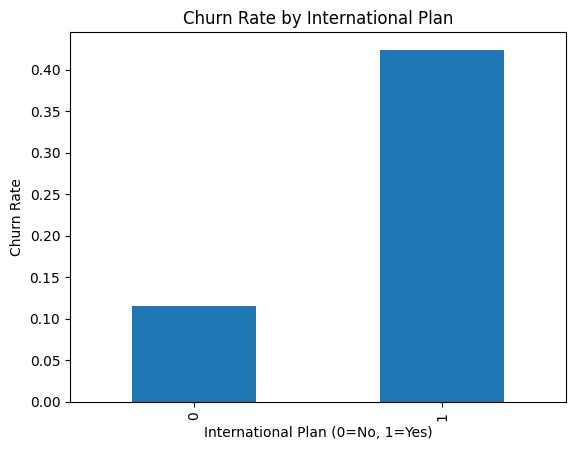

In [4]:
# Example: Churn rate by international plan
churn_by_plan = df.groupby('international plan')['churn'].mean()
churn_by_plan.plot(kind='bar')
plt.title('Churn Rate by International Plan')
plt.xlabel('International Plan (0=No, 1=Yes)')
plt.ylabel('Churn Rate')
plt.show()

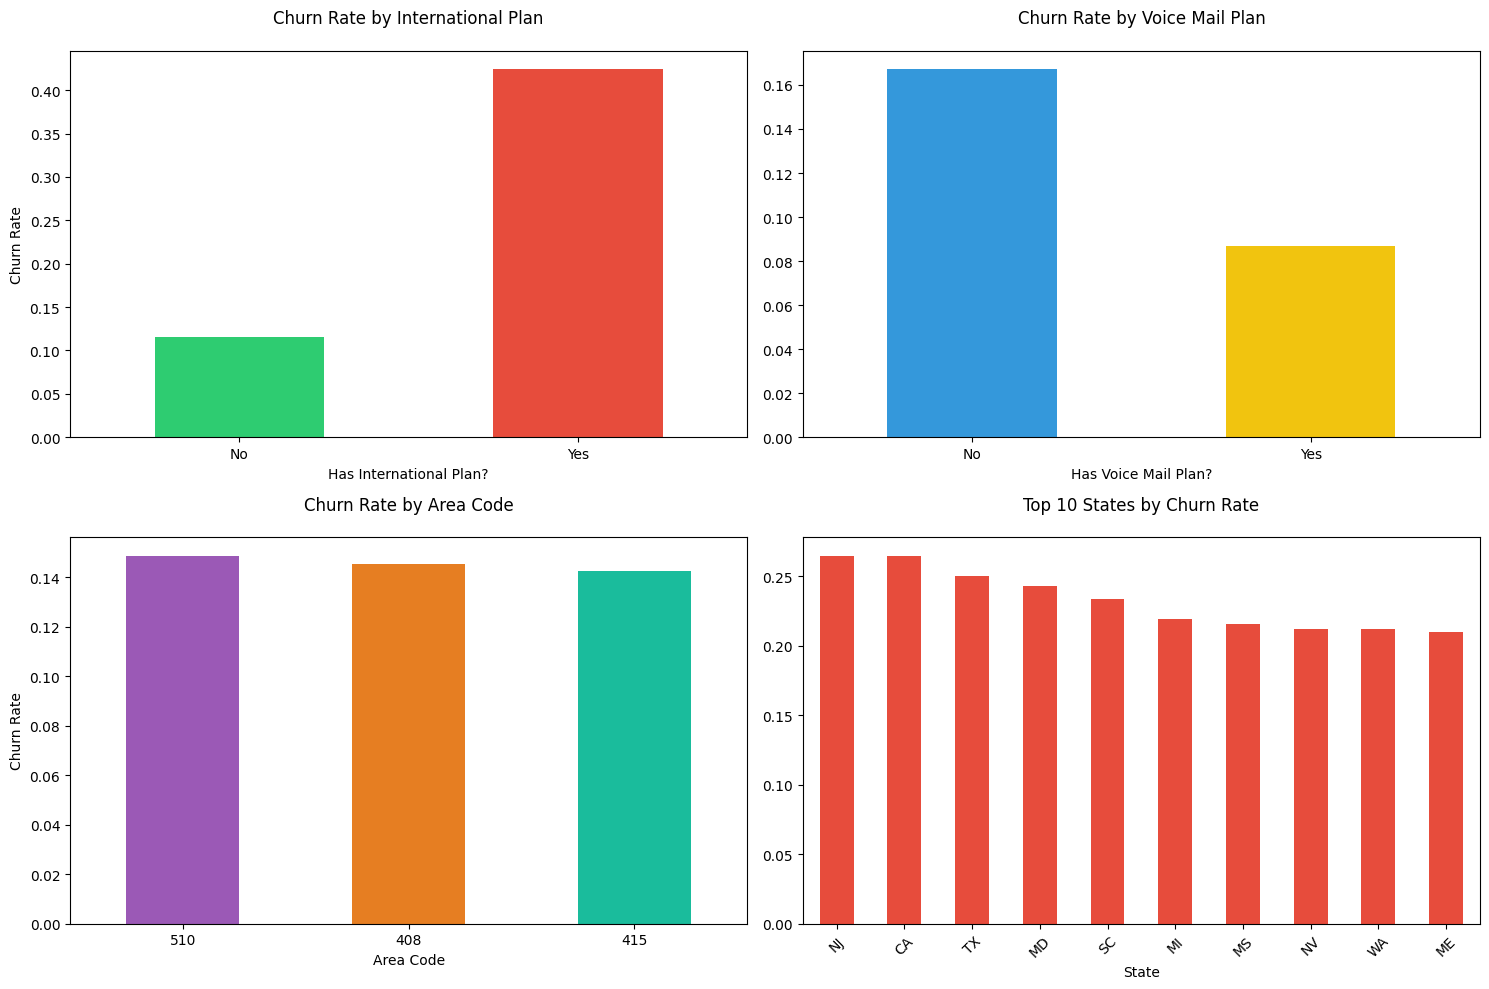

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data and preprocess
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df = df.drop('phone number', axis=1)

# Convert to binary numerical values
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})
df['churn'] = df['churn'].astype(int)  # Convert boolean to 0/1

# Create visualization grid
plt.figure(figsize=(15, 10))

# 1. International Plan
plt.subplot(2, 2, 1)
df.groupby('international plan')['churn'].mean().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Churn Rate by International Plan', pad=20)
plt.xlabel('Has International Plan?')
plt.ylabel('Churn Rate')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)

# 2. Voice Mail Plan
plt.subplot(2, 2, 2)
df.groupby('voice mail plan')['churn'].mean().plot(kind='bar', color=['#3498db', '#f1c40f'])
plt.title('Churn Rate by Voice Mail Plan', pad=20)
plt.xlabel('Has Voice Mail Plan?')
plt.ylabel('')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)

# 3. Area Codes (Top 3)
plt.subplot(2, 2, 3)
df['area code'] = df['area code'].astype(str)  # Treat as categorical
area_churn = df.groupby('area code')['churn'].mean().sort_values(ascending=False)
area_churn.plot(kind='bar', color=['#9b59b6', '#e67e22', '#1abc9c'])
plt.title('Churn Rate by Area Code', pad=20)
plt.xlabel('Area Code')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)

# 4. States (Top 10)
plt.subplot(2, 2, 4)
state_churn = df.groupby('state')['churn'].mean().sort_values(ascending=False).head(10)
state_churn.plot(kind='bar', color='#e74c3c')
plt.title('Top 10 States by Churn Rate', pad=20)
plt.xlabel('State')
plt.ylabel('')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [12]:
# Separate features (X) and target (y)
X = df.drop('churn', axis=1)
y = df['churn'].astype(int)  # Convert churn to 0/1 directly

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = DecisionTreeClassifier(max_depth=3, random_state=42)  # Adjust max_depth to prevent overfitting
model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.89
